In [20]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris

from poliastro.twobody.propagation import propagate, cowell
from poliastro.ephem import build_ephem_interpolant
from poliastro.core.elements import rv2coe

from poliastro.constants import rho0_earth, H0_earth
from poliastro.core.perturbations import atmospheric_drag_exponential, third_body, J2_perturbation
from poliastro.bodies import Earth, Moon
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter3D

np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [11]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
# pio.renderers.default = "notebook_connected

[0.00000000e+00 5.78993200e-04 1.15798640e-03 ... 1.15624942e+00
 1.15682841e+00 1.15740741e+00]
(2000,)


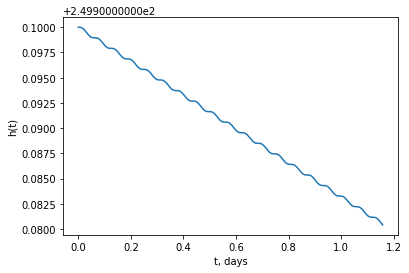

In [18]:
# https://poliastro-py.readthedocs.io/en/latest/examples/Natural%20and%20artificial%20perturbations.html

R = Earth.R.to(u.km).value
k = Earth.k.to(u.km ** 3 / u.s ** 2).value

orbit = Orbit.circular(Earth, 250 * u.km, epoch=Time(0.0, format="jd", scale="tdb"))

# parameters of a body
C_D = 2.2  # dimentionless (any value would do)
A_over_m = ((np.pi / 4.0) * (u.m ** 2) / (100 * u.kg)).to_value(
    u.km ** 2 / u.kg
)  # km^2/kg
B = C_D * A_over_m

# parameters of the atmosphere
rho0 = rho0_earth.to(u.kg / u.km ** 3).value  # kg/km^3
H0 = H0_earth.to(u.km).value

tofs = TimeDelta(np.linspace(0 * u.h, 100000 * u.s, num=2000))
print(tofs)
print(tofs.shape)
rr = propagate(
    orbit,
    tofs,
    method=cowell,
    ad=atmospheric_drag_exponential,
    R=R,
    C_D=C_D,
    A_over_m=A_over_m,
    H0=H0,
    rho0=rho0
)


plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, rr.norm() - Earth.R)

In [ ]:
rr = propagate(
    orbit,
    tofs,
    method=cowell,
    ad=atmospheric_drag_exponential,
    R=R,
    C_D=C_D,
    A_over_m=A_over_m,
    H0=H0,
    rho0=rho0
)


plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, rr.norm() - Earth.R)

In [23]:
import pandas as pd
df = pd.DataFrame(
    {
        "Animal": ["Falcon", "Parrot", "Falcon", "Falcon", "Parrot"],
        "Speed": [100, 5, 200, 300, 15],
    }
)

In [24]:
pd.Grouper(key="Animal")

Grouper(key='Animal', axis=0, sort=False)

In [25]:
my_data=pd.DataFrame(
             data={'Letter' : ['A','B','A','A','B','C','C','D','B'],
                   'Number' : [1,2,3,1,2,3,5,6,9]})
my_data

,Letter,Number
0,A,1
1,B,2
2,A,3
3,A,1
4,B,2
5,C,3
6,C,5
7,D,6
8,B,9


In [30]:
data_1=my_data.groupby('Letter')
data_1.head()

,Letter,Number
0,A,1
1,B,2
2,A,3
3,A,1
4,B,2
5,C,3
6,C,5
7,D,6
8,B,9
